# Pymaceuticals Inc.
---

### Analysis

Looking at the Tumor Volume Summary Statistics, we can observe that the mean tumor volume for mice treated with Capomulin and Ramicane was significantly (approximately 25%) lower than those who received treatment with other drug regimens. In fact, these two treatments were the only regimens which yielded a lower mean than the initial Tumor Volume (mm3) of 45 mm3. Considering that the initial tumor volume was consistent across all 249 mice who were identified with squamous cell carcinoma (SCC) tumors, the lower mean indicates that tumor development was more successfully inhibited by these drug regimens. 

The Final Tumor Volume box plot confirms these findings, with the lower bound values for Tumor Volume in mice treated with Infubinol or Ceftamin being at approximately the same level as the upper bound values for mice under Capomulin or Ramicane regimen.

Observing tumor development of a specific mouse (Mouse ID: u364) being treated with Capomulin, Pymaceuticals’ drug of interest, through the "Capomulin Treatment of Mouse u364" line plot, we can see a clear negative relationship between Tumor Volume and treatment progression (Timepoint). This indicates this medication's effectiveness in treating SCC.

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
completeDF = pd.merge(study_results, mouse_metadata, how = "left", on = "Mouse ID")

# Display the data table for preview
completeDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [241]:
timepoint0 = completeDF.loc[completeDF["Timepoint"] == 0]
if timepoint0['Tumor Volume (mm3)'].nunique() == 1:
    print(f'All row values in col1 are the same')
else:
    print('Not all row values in col1 are the same')

All row values in col1 are the same


In [64]:
# Checking the number of mice.
# miceCount = completeDF.nunique()["Mouse ID"]
miceCount = len(completeDF["Mouse ID"].unique())
print(miceCount)

249


In [65]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# returns a Pandas Series containing unique 'Mouse ID' values from the rows of completeDF 
# that have no duplicates based on both 'Mouse ID' and 'Timepoint' columns
duplicateMiceID = completeDF.loc[completeDF.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicateMiceID

array(['g989'], dtype=object)

In [66]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMice = completeDF.loc[completeDF['Mouse ID'] == 'g989']
duplicateMice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# drop duplicate mouse id using loc or isin()
# .isin() creates a boolean list indicating whether each value in the Series is contained in the duplicateMiceID list
# == False -> True indicates that the value is not in duplicate_mouse_ids
cleanCompleteDF = completeDF[completeDF["Mouse ID"].isin(duplicateMiceID) == False]
cleanCompleteDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [68]:
# Checking the number of mice in the clean DataFrame.
uniqueMiceCount = len(cleanCompleteDF["Mouse ID"].unique())
print(uniqueMiceCount)

248


## Summary Statistics

In [69]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumorVolumeMean = (cleanCompleteDF.groupby("Drug Regimen")["Tumor Volume (mm3)"]).mean()
tumorVolumeMedian = (cleanCompleteDF.groupby("Drug Regimen")["Tumor Volume (mm3)"]).median()
tumorVolumeVariance = (cleanCompleteDF.groupby("Drug Regimen")["Tumor Volume (mm3)"]).var()
tumorVolumeStdDev = (cleanCompleteDF.groupby("Drug Regimen")["Tumor Volume (mm3)"]).std()
tumorVolumeSEM = (cleanCompleteDF.groupby("Drug Regimen")["Tumor Volume (mm3)"]).sem()

# Assemble the resulting series into a single summary DataFrame.
tumorVolumeSummary = pd.DataFrame({
    "Mean Tumor Volume" : tumorVolumeMean,
    "Median Tumor Volume" : tumorVolumeMedian,
    "Tumor Volume Variance" : tumorVolumeVariance,
    "Tumor Volume Std. Dev." : tumorVolumeStdDev,
    "Tumor Volume Std. Err" : tumorVolumeSEM
})

tumorVolumeSummary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [70]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
# agg() method takes a dictionary as an argument 
# keys are the column names and the values are the list of aggregation functions to apply
tumorVolumeStats = cleanCompleteDF.groupby("Drug Regimen").agg(
    { 'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']}
)

tumorVolumeStats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

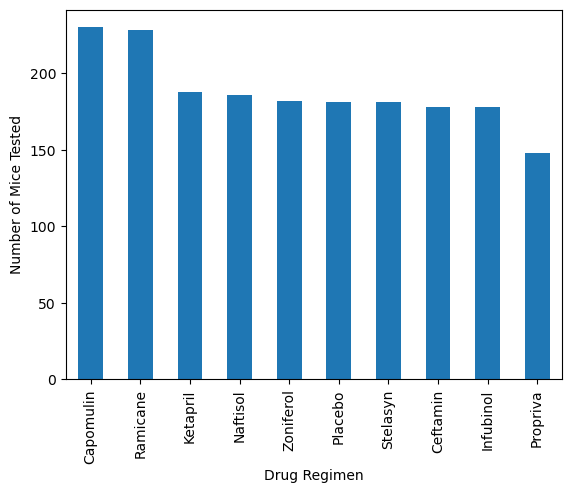

In [71]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# set x axis and tick locations
# start by making a new dataframe using the Drug Regimen column and drug regimen counts
drugRegimenCount = pd.DataFrame(cleanCompleteDF.groupby("Drug Regimen").count()["Mouse ID"].sort_values(ascending = False))
drugRegimenCount

# use plot(), using the drug regimen as the ticks, and the mouse count as y data

drugRegimenPlot = drugRegimenCount.plot(kind = "bar", legend = False)
drugRegimenPlot.set_xticklabels(drugRegimenCount.index)
drugRegimenPlot.set_xlabel("Drug Regimen")
drugRegimenPlot.set_ylabel("Number of Mice Tested")

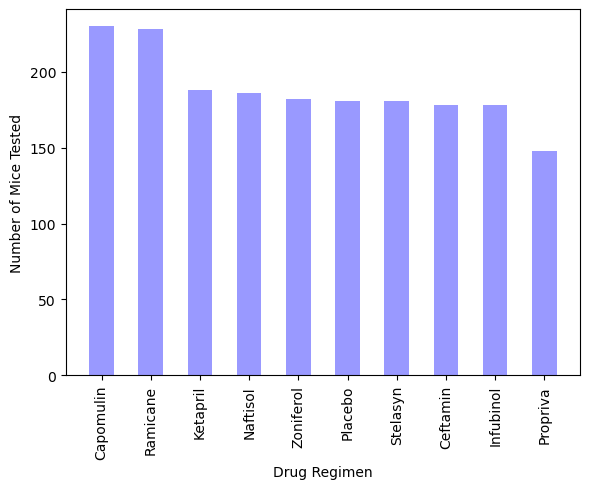

In [72]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
# set x axis and tick locations
x_axis = np.arange(len(cleanCompleteDF["Drug Regimen"].unique()))
x_tick_locations = [drug for drug in x_axis]

# set y axis
y_axis = cleanCompleteDF.groupby("Drug Regimen").count()["Mouse ID"].sort_values(ascending = False)

plt.figure(figsize=(6,5))
plt.bar(x_axis, y_axis, color = "b", alpha = 0.40, width = 0.5)
plt.xticks(x_tick_locations, y_axis.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.tight_layout()

array([<AxesSubplot:ylabel='Sex'>], dtype=object)

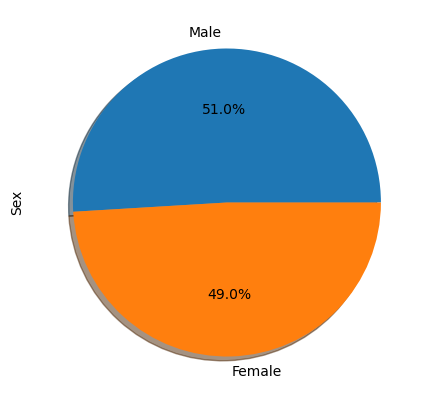

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
maleMiceCount = cleanCompleteDF.loc[cleanCompleteDF["Sex"] == "Male"].count()["Mouse ID"]
femaleMiceCount = cleanCompleteDF.loc[cleanCompleteDF["Sex"] == "Female"].count()["Mouse ID"]

sexChart = pd.DataFrame({
    "Gender" : ["Male", "Female"],
    "Sex" : [maleMiceCount, femaleMiceCount]
})

sexChart = sexChart.set_index("Gender")
sexPieChart = sexChart.plot(kind = "pie", subplots = True, autopct='%1.1f%%', legend = False, shadow = True, figsize = (6,5))
sexPieChart

Text(0, 0.5, 'Sex')

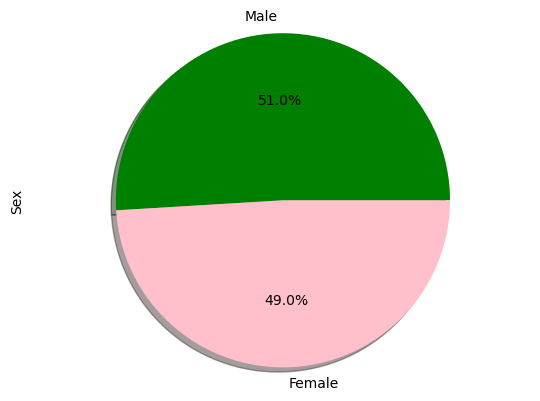

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
values = [maleMiceCount, femaleMiceCount]
labels = ["Male", "Female"]
colors = ["green", "pink"]
plt.pie(values, labels = labels, colors = colors, shadow = True, autopct = "%1.1f%%")
plt.axis("equal")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
cleanReducedDF = cleanCompleteDF.loc[cleanCompleteDF["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
cleanReducedDF = cleanReducedDF.reset_index(drop = True)
# cleanReducedDF

# Start by getting the last (greatest) timepoint for each mouse
finalTimepointDF = pd.DataFrame(cleanReducedDF.groupby('Mouse ID').max()['Timepoint'])
finalTimepointDF = finalTimepointDF.reset_index(drop = True)
# finalTimepointDF

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
cleanReducedDF = pd.DataFrame(pd.merge(cleanReducedDF, finalTimepointDF, how = "left", on = 'Mouse ID'))
cleanReducedDF = cleanReducedDF.rename(columns = {"Timepoint_y" : "Final Timepoint", "Timepoint_x" : "Timepoint"})
# cleanReducedDF

finalTumorVolumeDF = cleanReducedDF.loc[cleanReducedDF['Timepoint'] == cleanReducedDF['Final Timepoint']]
finalTumorVolumeDF

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Final Timepoint
52,u153,0,45.000000,0,Ceftamin,Female,11,25,0
64,b447,0,45.000000,0,Ceftamin,Male,2,30,0
68,x226,0,45.000000,0,Ceftamin,Male,23,28,0
73,t573,0,45.000000,0,Ceftamin,Female,15,27,0
154,c326,5,36.321346,0,Infubinol,Female,18,25,5
...,...,...,...,...,...,...,...,...,...
809,a644,45,32.978522,1,Ramicane,Female,7,17,45
810,i177,45,33.562402,3,Ramicane,Male,10,18,45
811,r944,45,41.581521,2,Capomulin,Male,12,25,45
812,u364,45,31.023923,3,Capomulin,Male,18,17,45


In [124]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = cleanReducedDF["Drug Regimen"].unique()
# Convert the array to a list
treatments = treatments.tolist()
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumorVolumeList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolume = finalTumorVolumeDF.loc[finalTumorVolumeDF["Drug Regimen"] == drug, 'Tumor Volume (mm3)'] 
    
    # add subset 
    tumorVolumeList += [tumorVolume]
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolume.quantile([.25,.5,.75])
    
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = tumorVolume.loc[(tumorVolume < lower_bound) | (tumorVolume > upper_bound)]
    
    print(f" {drug}'s potential outliers: {outliers}")

 Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Infubinol's potential outliers: 154    36.321346
Name: Tumor Volume (mm3), dtype: float64
 Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
 Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


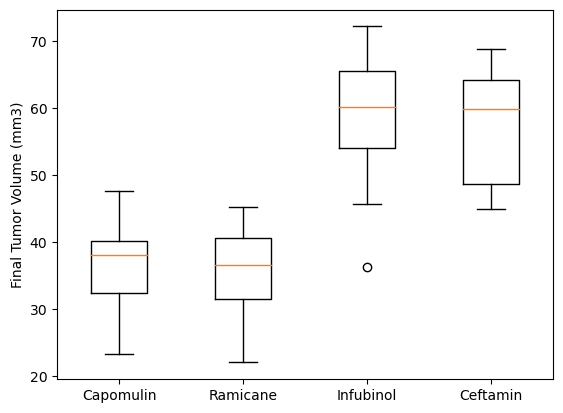

In [147]:
#fig = plt.figure(figsize =(10, 7))
drug1 = finalTumorVolumeDF.loc[finalTumorVolumeDF["Drug Regimen"] == "Capomulin", 'Tumor Volume (mm3)'] 
drug2 = finalTumorVolumeDF.loc[finalTumorVolumeDF["Drug Regimen"] == "Ramicane", 'Tumor Volume (mm3)'] 
drug3 = finalTumorVolumeDF.loc[finalTumorVolumeDF["Drug Regimen"] == "Infubinol", 'Tumor Volume (mm3)'] 
drug4 = finalTumorVolumeDF.loc[finalTumorVolumeDF["Drug Regimen"] == "Ceftamin", 'Tumor Volume (mm3)'] 

data = [drug1, drug2, drug3, drug4]
data

xAxisPoints = np.arange(len(data)) 
x_ticks = [x for x in xAxisPoints]

# create box plot
fig1, ax1 = plt.subplots()
ax1.boxplot(data)
# set labels
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin Treatment of Mouse u364')

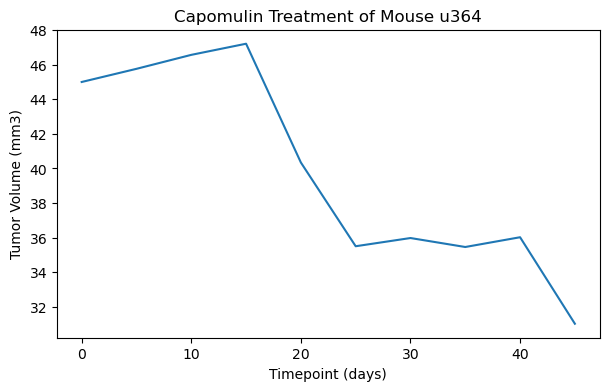

In [187]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseU364 = cleanCompleteDF.loc[(cleanCompleteDF['Drug Regimen'] == 'Capomulin')] 
mouseU364 = mouseU364.loc[(mouseU364['Mouse ID'] == 'u364')]
mouseU364 = mouseU364[['Timepoint', 'Tumor Volume (mm3)']]
mouseU364 = mouseU364.set_index("Timepoint")
mouseU364

mouseU364Plot = mouseU364.plot(kind = 'line', figsize = (7,4), legend = False)
mouseU364Plot.set_ylabel("Tumor Volume (mm3)")
mouseU364Plot.set_xlabel("Timepoint (days)")
mouseU364Plot.set_title("Capomulin Treatment of Mouse u364")

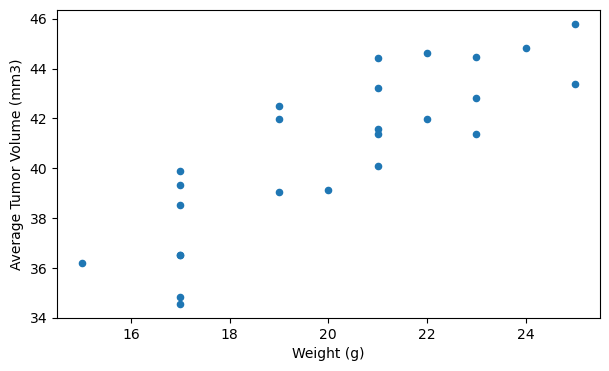

In [225]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulinRegimenDF = cleanCompleteDF.loc[(cleanCompleteDF['Drug Regimen'] == 'Capomulin')] 

capomulinTumorVolume = capomulinRegimenDF.groupby('Mouse ID').mean()['Tumor Volume (mm3)']
capomulinWeight = capomulinRegimen.groupby('Mouse ID').mean()["Weight (g)"]

capomulinWTM = pd.DataFrame({
    "Weight (g)" : capomulinWeight,
    "Average Tumor Volume (mm3)" : capomulinTumorVolume
})

capomulinWTM

capomulinRegimenPlot = capomulinWTM.plot(kind = 'scatter', x = 'Weight (g)', y = 'Average Tumor Volume (mm3)', figsize = (7,4), legend = False)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(5.8, 0.8, 'y = 0.95x + 21.55')

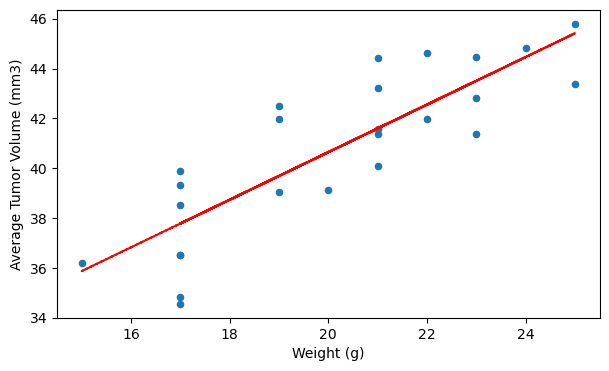

In [236]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(capomulinWeight, capomulinTumorVolume)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinWeight, capomulinTumorVolume)
regress_values = capomulinWeight * slope + intercept
# make a string for a line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

capomulinRegimenPlot = capomulinWTM.plot(kind = 'scatter', x = 'Weight (g)', y = 'Average Tumor Volume (mm3)', figsize = (7,4), legend = False)
# plt.scatter(capomulinWeight, capomulinTumorVolume)
# plot linear regression line
plt.plot(capomulinWeight,regress_values,"r--")
# annotate linear regression line with line of best fit equation
plt.annotate(line_eq, (5.8,0.8),fontsize=15,color="red")
